In [1]:
import matplotlib.pyplot as plt
from capstone_project import utility
from sklearn.metrics import roc_curve, auc

%matplotlib inline
plt.style.use('seaborn-white')

/home/andre/software/anaconda3/envs/capstone_project/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
file_directory = "../output/data/"

val_data = utility.load_pickle(file_directory, "val_features.pkl")
val_labels = utility.load_pickle(file_directory, "val_labels.pkl")

In [3]:
model_directory = "../output/models/"

logistic_pipe = utility.load_pickle(model_directory, "for_validation_logistic_pipe.pkl")
xgboost = utility.load_pickle(model_directory, "for_validation_xgboost.pkl") 

In [4]:
benchmark_preds = val_data["word_share"]
logistic_preds = logistic_pipe.predict_proba(val_data)[:,1]
xgboost_preds = xgboost.predict_proba(val_data)[:,1]
lstm_preds = utility.load_pickle(file_directory, "lstm_preds_on_val.pkl")

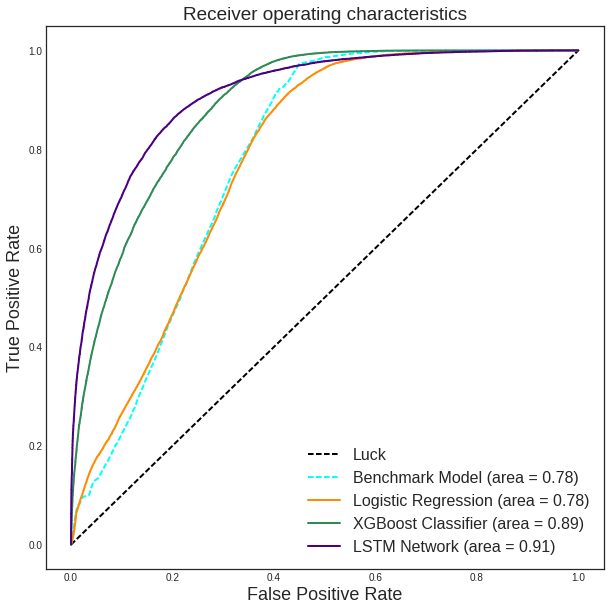

In [6]:
benchmark_fpr, benchmark_tpr, thresholds = roc_curve(val_labels, benchmark_preds)
benchmark_roc_auc = auc(benchmark_fpr, benchmark_tpr)
logistic_fpr, logistic_tpr, thresholds = roc_curve(val_labels, logistic_preds)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)
xgboost_fpr, xgboost_tpr, thresholds = roc_curve(val_labels, xgboost_preds)
xgboost_roc_auc = auc(xgboost_fpr, xgboost_tpr)
lstm_fpr, lstm_tpr, thresholds = roc_curve(val_labels, lstm_preds)
lstm_roc_auc = auc(lstm_fpr, lstm_tpr)

lw = 2
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], linestyle="--", lw=lw, color="k", label="Luck")
plt.plot(benchmark_fpr, benchmark_tpr, linestyle="--", color="cyan", lw=lw, label="Benchmark Model (area = {:.2f})"
         .format(benchmark_roc_auc))
plt.plot(logistic_fpr, logistic_tpr, color="darkorange", lw=lw, label="Logistic Regression (area = {:.2f})"
         .format(logistic_roc_auc))
plt.plot(xgboost_fpr, xgboost_tpr, color="seagreen", lw=lw, label="XGBoost Classifier (area = {:.2f})"
         .format(xgboost_roc_auc))
plt.plot(lstm_fpr, lstm_tpr, color="indigo", lw=lw, label="LSTM Network (area = {:.2f})"
         .format(lstm_roc_auc))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.title("Receiver operating characteristics", fontsize=19)
plt.legend(loc="lower right", fontsize=16)
plt.savefig("../output/figures/summary_roc_plot.png")
plt.show()